In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Let's calculate some basic statistics regarding a body of text. We'll start with reading Beowulf from a text file, since that's a common use case when you're working with text data. 

In [1]:
import nltk
import numpy as np

#from nltk.book import *
from nltk.corpus import gutenberg
from string import punctuation
from collections import Counter
from nltk.corpus import brown
from nltk import FreqDist

from pprint import pprint # get some prettier printing of objects

from nltk.corpus import stopwords

sw = stopwords.words('english')

In [2]:
beowulf = open("beowulf.txt",'r').read()

As always, we start with tokenization and normalization. Create a new variable, `beo_clean` that splits on whitespace, casts to lowercase, removes any tokens where `isalpha` is false, and removes stopwords.

In [3]:
beo_clean = [w for w in beowulf.split()]
beo_clean = [w.lower() for w in beo_clean if w.isalpha() and w not in sw]

Let's rip through the basic statistics: 

1. Overall text length (number of tokens)
1. Number of unique tokens
1. Lexical diversity 
1. Average token length
1. Distribution of token lengths

In [5]:
print(f"Beowulf is {len(beo_clean)} tokens long.")
print(f"Beowulf has {len(set(beo_clean))} unique tokens.")

print(f"Beowulf's lexical diversity is {len(set(beo_clean))/len(beo_clean):.3f}.")

# Build a vector of token length
beo_token_len = [len(w) for w in beo_clean]

print(f"Beowulf's average token length is {np.mean(beo_token_len):.2f}.")

pprint(sorted(Counter(beo_token_len).items()))

print("")
print("All statistics are calculated after normalization and tokenization.")


Beowulf is 10146 tokens long.
Beowulf has 3033 unique tokens.
Beowulf's lexical diversity is 0.299.
Beowulf's average token length is 5.14.
[(1, 205),
 (2, 251),
 (3, 1135),
 (4, 2719),
 (5, 2053),
 (6, 1540),
 (7, 1060),
 (8, 725),
 (9, 285),
 (10, 100),
 (11, 51),
 (12, 16),
 (13, 3),
 (14, 1),
 (15, 2)]

All statistics are calculated after normalization and tokenization.


### Frequency Distributions

Frequency distributions are *incredibly* useful early in a text analysis. Let's build one for `beo_clean` and look at the 30 most common tokens

In [6]:
beo_fd = FreqDist(beo_clean)

beo_fd.most_common(30)

[('i', 167),
 ('the', 111),
 ('beowulf', 58),
 ('men', 56),
 ('then', 53),
 ('shall', 48),
 ('son', 47),
 ('thou', 47),
 ('king', 46),
 ('lord', 45),
 ('one', 45),
 ('many', 44),
 ('thy', 44),
 ('could', 43),
 ('though', 43),
 ('folk', 40),
 ('far', 36),
 ('ever', 35),
 ('old', 35),
 ('till', 34),
 ('would', 34),
 ('but', 33),
 ('hrothgar', 32),
 ('life', 32),
 ('man', 31),
 ('yet', 31),
 ('well', 30),
 ('might', 30),
 ('hardy', 30),
 ('long', 29)]

How many tokens have a count of 1 and what fraction do they represent? These are also called "hapaxes".

In [7]:
single_use = []

for token, cnt in beo_fd.items() :
    if cnt == 1 :
        single_use.append(token)
        
        
print(len(single_use))

1589


In [8]:
single_use[:20]

['anonymous',
 'translated',
 'gummere',
 'prelude',
 'founder',
 'scefing',
 'squadroned',
 'awing',
 'feeling',
 'lacked',
 'endowed',
 'scandian',
 'becomes',
 'quit',
 'charged',
 'roadstead',
 'rocked',
 'fetched',
 'freighted',
 'floating']

In [9]:
len(single_use)/len(beo_fd)

0.5239037256841411

Interesting, about half the words only appear once. 

Frequency distribution objects come along with a plot method that can be quite useful. Plot the first 25 tokens (example is at the end section 3.1 of [chapter 1 of the NLTK book](https://www.nltk.org/book/ch01.html). 

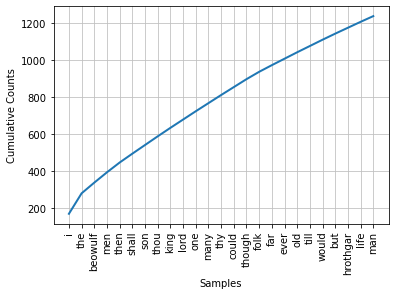

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
beo_fd.plot(25, cumulative=True)

There are a number of useful methods available for the `FreqDist` object. They're summarized in [this table](https://www.nltk.org/book/ch01.html#tab-freqdist) in NLTK Chapter 1.


Not many words are longer than 12 characters. Let's take a look at them. 

In [11]:
for word in beo_fd :
    if len(word) >= 12 :
        print(word)
        

breastplates
slaughtering
unsuccessful
slaughterous
withstanding
representative
representations
personification
inconsistency
nevertheless
subsequently
affectionate
statesmanlike
interpolation
illustration
scandinavian
propitiation
illustrating
interference


### NLTK Functions

The NLKT library comes with a number of helpful functions. In order to take advantage of those, you'll need to run your list of tokens through `nltk.Text`. 

In [12]:
beo_nltk = nltk.Text(beo_clean)

### Concordance

Concordances give you words in context. Let's look at usages of "hrothgar", the [Danish king](https://en.wikipedia.org/wiki/Hrothgar) featured in the book.  

In [13]:
beo_nltk.concordance("hrothgar")

Displaying 25 of 32 matches:
children halga i heard helpmate to hrothgar given glory honor kin obeyed gladl
ghts shows terrific rage hatred to hrothgar i greatness soul would succor may 
all broad gable bright folk houses hrothgar gleam lightened lands the sturdy s
met i strangers mood plain plunged hrothgar ye him bespake proud earl weders a
ughty monarch may deign hied haste hrothgar sat earls till stout thane stood s
thy leader hero hither henchmen vi hrothgar helmet knew yore youthful aged fat
ther waves ye may wend way helmets hrothgar let bide wooden wait uprose mighty
irloom hrethel work fares wyrd vii hrothgar fight friend succor thou hast soug
striding wan the warriors man made hrothgar bade let wield wine word man erst 
ail thee thou bidest battle x then hrothgar went forth fain would wealhtheow c
ill gladly flashing not first home hrothgar yet late hardy to house warrior wa
en crowd maidens measured path xiv hrothgar hall stood steep roof garnished si
eceived many kinsmen sa

You'd need to know more Beowulf than I do to appreciate these words. Let's look at the example from the NLTK book, comparing the usage of "monstrous" between _Moby Dick_ and _Sense and Sensibility_. 

In [14]:
text1.concordance("monstrous")

NameError: name 'text1' is not defined

In [ ]:
text2.concordance("monstrous")

As you can see, Austen uses the word in _Sense and Sensibility_ in a different way from our modern usage. 

Related to concordances is the concept of similarity. 

In [20]:
beo_nltk.similar("son")

beowulf booty sword shalt


In [21]:
text1.similar("whale")

NameError: name 'text1' is not defined

In [22]:
text2.similar("love")

NameError: name 'text2' is not defined

### Collocations

Collocations are words that tend to appear together in a text. There are a number of different methods of deciding which collocations are "most interesting". One option is simple frequency: the collocations that appear a lot are the most important. Another option is to look at how often the words occur together versus how often they appear alone, using a calculation called [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) (PMI). Either way, we'll need to bring in some technology from the NLTK library to make these work.

It can be quite useful to limit to some sort of minimal frequency if you're using the PMI measure. 

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
beo_coll = BigramCollocationFinder.from_words(beo_clean)

In [ ]:
beo_coll.nbest(bigram_measures.raw_freq,10)

In [ ]:
beo_coll.apply_freq_filter(3)
beo_coll.nbest(bigram_measures.pmi,10)

In [ ]:
# You could also do the frequency collocation with bigrams and FreqDist
beo_bigram_fd = FreqDist(nltk.bigrams(beo_clean))
beo_bigram_fd.most_common(10)

### Words Corpus

NLTK includes a corpus of words. It will occasionally be useful for us.

In [ ]:
nltk_words = nltk.corpus.words.words()
len(nltk_words)

In [ ]:
"happy" in nltk_words

In [ ]:
"hppy" in nltk_words